# Gene distance 5 tissue consistent

In [1]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

# distance to gene TSS

In [2]:
%%bash
### process-specific CHM
cd ~/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/ChromatinStates/Cavalli_Cell2017_ABcompartment_5tissue/CHM_intersect_table
mkdir -p distance_from_gene
for compart in A B;do
    # for process in Universal Universal_complementarySet EarlyEmbryogenesis_complementarySet EarlyEmbryogenesis_complementarySet_otherCommon PGCsDevelopment_complementarySet PGCsDevelopment_complementarySet_otherCommon Spermatogenesis_complementarySet Spermatogenesis_complementarySet_otherCommon RetinalDevelopment_complementarySet RetinalDevelopment_complementarySet_otherCommon HeartDevelopment_complementarySet HeartDevelopment_complementarySet_otherCommon LiverDevelopment_complementarySet LiverDevelopment_complementarySet_otherCommon;do
    for process in Universal_complementarySet EarlyEmbryogenesis_complementarySet EarlyEmbryogenesis_complementarySet_otherCommon PGCsDevelopment_complementarySet PGCsDevelopment_complementarySet_otherCommon Spermatogenesis_complementarySet Spermatogenesis_complementarySet_otherCommon RetinalDevelopment_complementarySet RetinalDevelopment_complementarySet_otherCommon HeartDevelopment_complementarySet HeartDevelopment_complementarySet_otherCommon LiverDevelopment_complementarySet LiverDevelopment_complementarySet_otherCommon;do
        bedtools closest -b /mnt/Storage/home/yanghui/annotations/mm10/mm10.TSS.refGene.bed -a <(cut -f 1-3 intersectOnly_${process}CHM_5tissue_${compart}.bed) -d > distance_from_gene/TSS_distance_${process}CHM_${compart}.bed
    done
done

In [16]:
%%bash
### nonCHM
cd ~/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/ChromatinStates/Cavalli_Cell2017_ABcompartment_5tissue/nonCHM_intersect_table
# mkdir -p distance_from_gene
# for compart in A B;do
#     bedtools closest -b /mnt/Storage/home/yanghui/annotations/mm10/mm10.TSS.refGene.bed -a <(cut -f 1-3 intersectOnly_nonCHM_5tissue_${compart}.bed) -d > distance_from_gene/TSS_distance_nonCHM_${compart}.bed
# done

In [7]:
os.chdir('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/ChromatinStates/Cavalli_Cell2017_ABcompartment_5tissue')
tss_distance_df = pd.DataFrame()
for compart in ['A', 'B'] :
    for t in [
                'Universal', 
                'Universal_complementarySet',
                'EarlyEmbryogenesis_complementarySet', # 'EarlyEmbryogenesis_complementarySet_otherCommon',
                'PGCsDevelopment_complementarySet', # 'PGCsDevelopment_complementarySet_otherCommon',
                'Spermatogenesis_complementarySet', # 'Spermatogenesis_complementarySet_otherCommon',
                'RetinalDevelopment_complementarySet', # 'RetinalDevelopment_complementarySet_otherCommon',
                'HeartDevelopment_complementarySet', # 'HeartDevelopment_complementarySet_otherCommon',
                'LiverDevelopment_complementarySet', # 'LiverDevelopment_complementarySet_otherCommon',
                'nonCHM'
                ] :
        t_short = 'CHM' if t != 'nonCHM' else t
        t1 = t if t != 'nonCHM' else 'non'
        df = pd.read_csv(f'{t_short}_intersect_table/distance_from_gene/TSS_distance_{t1}CHM_{compart}.bed',
                                      sep = "\t", header = None, names = [ 
                                                                          'CHM_chr', 'CHM_start', 'CHM_end', 
                                                                          'chr', 'start', 'end', 'Transcript_id', 'score', 'strand',
                                                                          'distance']
                                     )
        df['Type'] = t
        df['compart'] = compart
        tss_distance_df = pd.concat([tss_distance_df, df])
    

tss_distance_df

,CHM_chr,CHM_start,CHM_end,chr,start,end,Transcript_id,score,strand,distance,Type,compart
0,chr1,34347200,34351500,chr1,34433199,34433200,NR_039562,0,-,81700,Universal,A
1,chr1,35788600,35795300,chr1,36068399,36068400,NM_015818,0,+,273100,Universal,A
2,chr1,37278600,37283600,chr1,37299837,37299838,NM_001290797,0,+,16238,Universal,A
3,chr1,37278600,37283600,chr1,37299837,37299838,NM_030266,0,+,16238,Universal,A
4,chr1,38704600,38709050,chr1,38627244,38627245,NM_001290814,0,-,77356,Universal,A
...,...,...,...,...,...,...,...,...,...,...,...,...
1249,chr9,88858000,88859000,chr9,88858967,88858968,NR_166623,0,+,0,nonCHM,B
1250,chr9,88858000,88859000,chr9,88858967,88858968,NR_166624,0,+,0,nonCHM,B
1251,chr9,89622000,89623000,chr9,89622986,89622987,NM_153509,0,-,0,nonCHM,B
1252,chr9,89623000,89624000,chr9,89622986,89622987,NM_153509,0,-,14,nonCHM,B


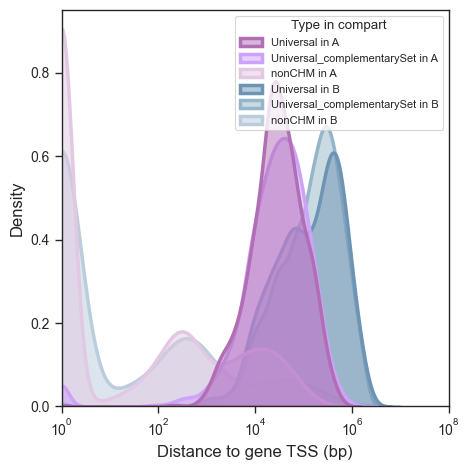

In [11]:
from statannot import add_stat_annotation

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 12,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 8
                         }):
    df = tss_distance_df.copy().reset_index()
    df = df.loc[df['Type'].isin(['Universal', 'Universal_complementarySet', 'nonCHM'])]
    df['distance'] = df['distance'] + 1
    df['Type in compart'] = df['Type'] + ' in ' + df['compart']
    fig, axes = plt.subplots(figsize = (6.4 * .75, 4.8 * 1), tight_layout = True, sharex = True)
    ax = axes
    sns.kdeplot(
        data=df, 
        x="distance", 
        hue="Type in compart",
       fill=True, common_norm=False, palette=['#B26EB5', '#CDA2F9', '#E2C8E3', '#6E94B5', '#94B6C8', '#BBCDDC'],
       alpha=.5, linewidth=2.5,
        ax = ax,
        log_scale = True
    )
#         sns.move_legend(ax, "upper left")
    ax.set_xlim(1,100000000)
#         ax.set_title(f'Distance of universal CHM to nearest TSS of genes\n({cell_type})')
#         ax.set_yscale('log')
#     ax.set_ylabel(f'Density of {t}')
    ax.set_xlabel('Distance to gene TSS (bp)')
    fig.savefig('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make13_kde_universalComplementaryNonCHM_ABcompart_distance_to_geneTSS_5tissue_consistent.pdf', transparent = True)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Universal_complementarySet_A v.s. Universal_complementarySet_B: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=1.092e+07
Universal_A v.s. Universal_B: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.942e-89 U_stat=2.352e+05
EarlyEmbryogenesis_complementarySet_A v.s. EarlyEmbryogenesis_complementarySet_B: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=4.300e+06
PGCsDevelopment_complementarySet_A v.s. PGCsDevelopment_complementarySet_B: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=7.762e+06
Spermatogenesis_complementarySet_A v.s. Spermatogenesis_complementarySet_B: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.493e-284 U_stat=1.950e+06
RetinalDevelopmen

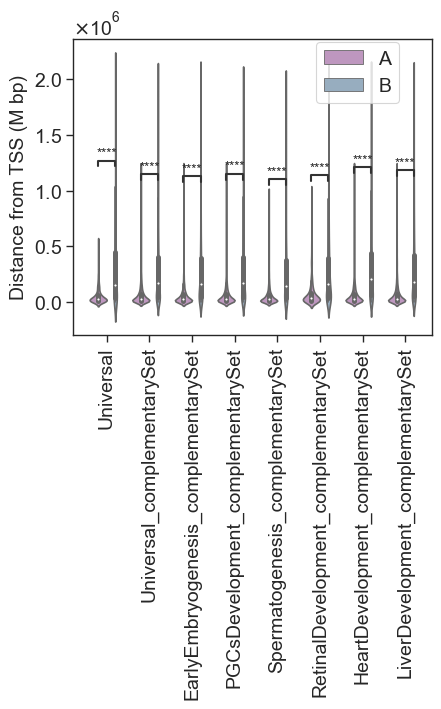

In [5]:
from statannot import add_stat_annotation

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 14,
                             'xtick.labelsize': 14,
                             'ytick.labelsize': 14,
                             'legend.fontsize': 14,
                             'legend.title.fontsize': 14
                         }):

            
    fig, ax = plt.subplots(figsize = (6.4 * .75, 4.8 * 1.5), tight_layout = True)
    sns.violinplot(
        data = tss_distance_df,
        x = 'Type',
        y = 'distance',
        hue = 'compart',
        ax = ax,
#         showfliers = False,
#         width = 0.618,
        palette = ['#C490C6', '#90ADC6'],
        boxprops=dict(alpha=.75),
    )
    add_stat_annotation(ax, data=tss_distance_df, x='Type', y='distance', hue = 'compart',
                        box_pairs=[((x.get_text(), 'A'), (x.get_text(), 'B')) for x in ax.get_xticklabels()],
                        test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
    h,l = ax.get_legend_handles_labels()
    ax.legend(h,l, loc = 'lower left', title = "", bbox_to_anchor=(.65, .75))
#     ax.set_title('Distance of universal CHM to nearest TSS of genes\n')
    ax.set_ylabel('Distance from TSS (M bp)')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90) 
    ax.set_xlabel('')
    ax.ticklabel_format(axis = 'y', style = 'scientific', useMathText=True)
    
#     fig.savefig('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make13_box_CHM_distance_to_TSS_5tissue.pdf', transparent = True)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Universal_complementarySet_A v.s. Universal_complementarySet_B: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=1.092e+07
Universal_A v.s. Universal_B: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.942e-89 U_stat=2.352e+05
EarlyEmbryogenesis_complementarySet_A v.s. EarlyEmbryogenesis_complementarySet_B: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=4.300e+06
PGCsDevelopment_complementarySet_A v.s. PGCsDevelopment_complementarySet_B: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=7.762e+06
Spermatogenesis_complementarySet_A v.s. Spermatogenesis_complementarySet_B: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.493e-284 U_stat=1.950e+06
RetinalDevelopmen

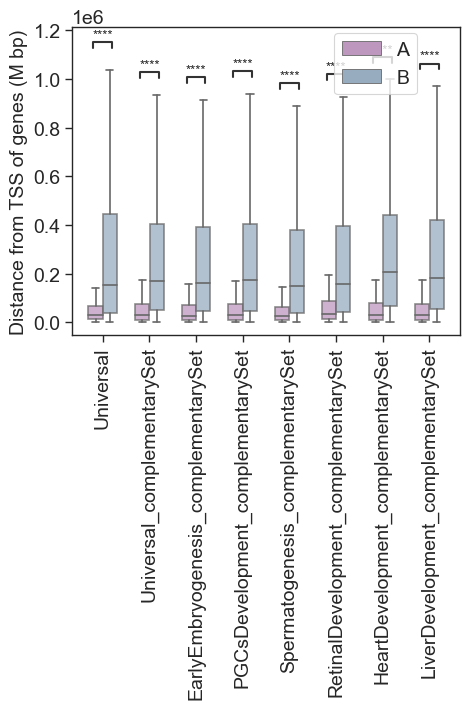

In [6]:
from statannot import add_stat_annotation

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 14,
                             'xtick.labelsize': 14,
                             'ytick.labelsize': 14,
                             'legend.fontsize': 14,
                             'legend.title.fontsize': 14
                         }):

            
    fig, ax = plt.subplots(figsize = (6.4 * .75, 4.8 * 1.5), tight_layout = True)
    sns.boxplot(
        data = tss_distance_df,
        x = 'Type',
        y = 'distance',
        hue = 'compart',
        ax = ax,
        showfliers = False,
        width = 0.618,
        palette = ['#C490C6', '#90ADC6'],
        boxprops=dict(alpha=.75),
        flierprops={"marker": "x", "markersize": 1},
    )
    add_stat_annotation(ax, data=tss_distance_df, x='Type', y='distance', hue = 'compart',
                        box_pairs=[((x.get_text(), 'A'), (x.get_text(), 'B')) for x in ax.get_xticklabels()],
                        test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
    h,l = ax.get_legend_handles_labels()
    ax.legend(h,l, loc = 'lower left', title = "", bbox_to_anchor=(.65, .75))
#     ax.set_title('Distance of universal CHM to nearest TSS of genes\n')
    ax.set_ylabel('Distance from TSS of genes (M bp)')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90) 
    ax.set_xlabel('')
#     ax.ticklabel_format(axis = 'y', style = 'scientific', useMathText=True)
    # ax.set_ylim(0,3000)
    
    # fig.savefig('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make13_box_universalProcessSpecificNonCHM_distance_to_gene_5tissue_consistent.pdf', transparent = True)
    fig.savefig('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make13_box_universalProcessSpecificComplementaryNonCHM_distance_to_gene_5tissue_consistent.pdf', transparent = True)

In [5]:
df

,index,CHM_chr,CHM_start,CHM_end,chr,start,end,Transcript_id,score,strand,distance,Type,compart,Type in compart
0,0,chr1,34347200,34351500,chr1,34433199,34433200,NR_039562,0,-,81701,Universal,A,Universal in A
1,1,chr1,35788600,35795300,chr1,36068399,36068400,NM_015818,0,+,273101,Universal,A,Universal in A
2,2,chr1,37278600,37283600,chr1,37299837,37299838,NM_001290797,0,+,16239,Universal,A,Universal in A
3,3,chr1,37278600,37283600,chr1,37299837,37299838,NM_030266,0,+,16239,Universal,A,Universal in A
4,4,chr1,38704600,38709050,chr1,38627244,38627245,NM_001290814,0,-,77357,Universal,A,Universal in A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69971,6703,chr9,109585500,109586200,chr9,109568262,109568263,NM_199036,0,-,17239,LiverDevelopment_complementarySet,B,LiverDevelopment_complementarySet in B
69972,6704,chr9,124315700,124317000,chr9,124312694,124312695,NM_001243117,0,-,3007,LiverDevelopment_complementarySet,B,LiverDevelopment_complementarySet in B
69973,6705,chr9,124315700,124317000,chr9,124312694,124312695,NM_001243118,0,-,3007,LiverDevelopment_complementarySet,B,LiverDevelopment_complementarySet in B
69974,6706,chr9,124315700,124317000,chr9,124312694,124312695,NM_001243119,0,-,3007,LiverDevelopment_complementarySet,B,LiverDevelopment_complementarySet in B
